<a href="https://colab.research.google.com/github/rikachan19/Kelompok10-JMK48-/blob/main/twicth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 10 (JMK 48**

Universitas Muhammadiyah Kota Sorong

ANGGOTA:

1.   MUHAMMAD RIZWAN DARWIS (KETUA)
2.   BILLY JES
3.   BRAYEN SYAHPUTRA
4.   MUHAMMAD RIFKI RAIHAN

Pada kesempatan kali ini kami akan membuat *machine learning* untuk menentukan game populer pada platform twitch menggunakan metode *random forest*.

link dataset yang kami gunakan:https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch/data



**IMPORT DATASET YANG TELAH KITA SIMPAN PADA GDRIVE**
---



In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Memuat data
global_data = pd.read_csv('/content/drive/MyDrive/setdata/Twitch_global_data.csv')

# Mengubah kolom year dan Month menjadi kolom datetime
global_data['date'] = pd.to_datetime(global_data[['year', 'Month']].assign(day=1))

# Menghapus kolom year dan Month
df_global = global_data.copy().drop(columns=['year', 'Month'])

# Menambahkan kolom dateordinal untuk digunakan dalam model
df_global['dateordinal'] = df_global['date'].map(dt.datetime.toordinal)

# Menampilkan 5 baris pertama data
df_global.head()


,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,date,dateordinal
0,480241904,646355,1275257,7701675,20076,12149,29.08,2016-01-01,735964
1,441859897,635769,1308032,7038520,20427,12134,28.98,2016-02-01,735995
2,490669308,660389,1591551,7390957,20271,12234,28.92,2016-03-01,736024
3,377975447,525696,1775120,6869719,16791,12282,28.80,2016-04-01,736055
4,449836631,605432,1438962,7535519,19394,12424,28.85,2016-05-01,736085


**VISUALISASI DATASET**


---



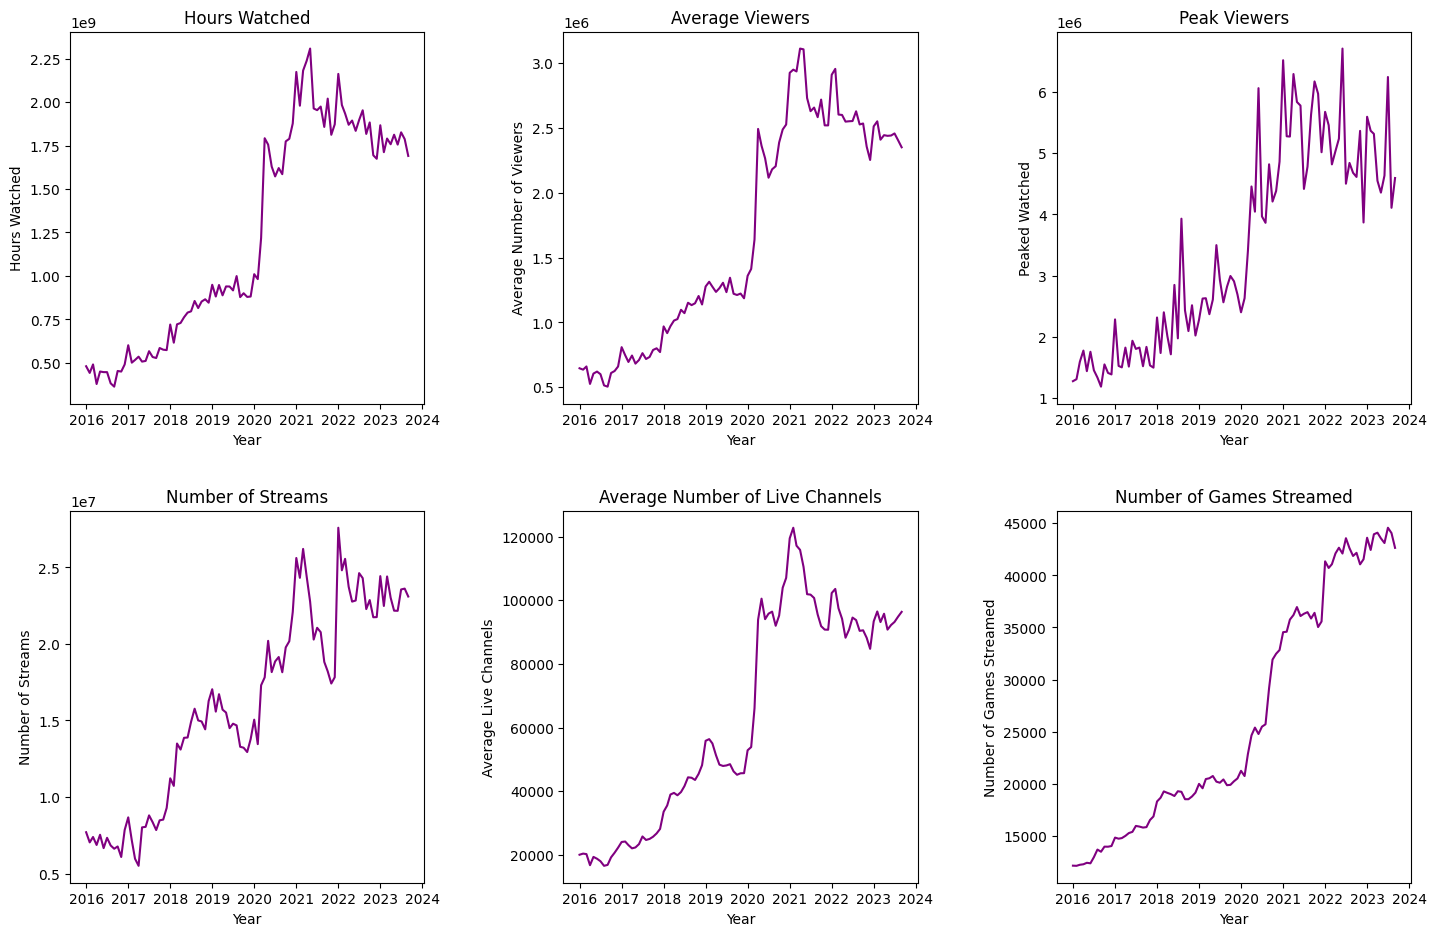

In [63]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(15,10))
sns.lineplot(data=df_global, x='date', y ='Hours_watched', color = 'purple', ax = axs[0,0]).set(xlabel = 'Year', ylabel = 'Hours Watched',title='Hours Watched')
sns.lineplot(data=df_global, x='date', y ='Avg_viewers', color = 'purple', ax = axs[0,1]).set(xlabel = 'Year', ylabel = 'Average Number of Viewers',title='Average Viewers')
sns.lineplot(data=df_global, x='date', y ='Peak_viewers', color = 'purple', ax = axs[0,2]).set(xlabel = 'Year', ylabel = 'Peaked Watched',title= 'Peak Viewers')
sns.lineplot(data=df_global, x='date', y ='Streams', color = 'purple', ax = axs[1,0]).set(xlabel = 'Year', ylabel = 'Number of Streams',title='Number of Streams')
sns.lineplot(data=df_global, x='date', y ='Avg_channels', color = 'purple', ax = axs[1,1]).set(xlabel = 'Year', ylabel = 'Average Live Channels',title='Average Number of Live Channels')
sns.lineplot(data=df_global, x='date', y ='Games_streamed', color = 'purple', ax = axs[1,2]).set(xlabel = 'Year', ylabel = 'Number of Games Streamed',title='Number of Games Streamed')
fig.tight_layout(pad=3.0)

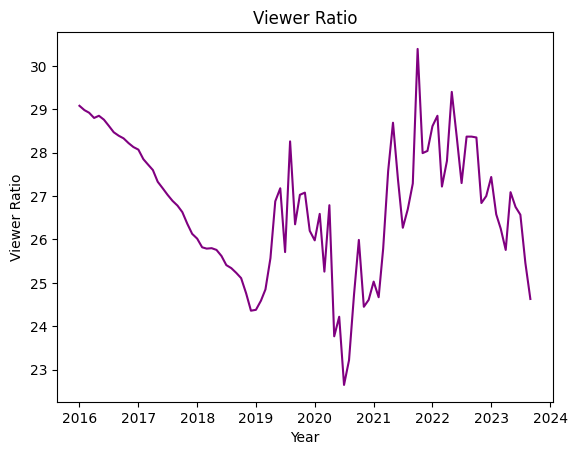

In [64]:
sns.lineplot(data=df_global, x='date', y ='Viewer_ratio', color = 'purple').set(xlabel = 'Year', ylabel = 'Viewer Ratio',title='Viewer Ratio')
plt.show()

<ipython-input-65-0e8ac315b278>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


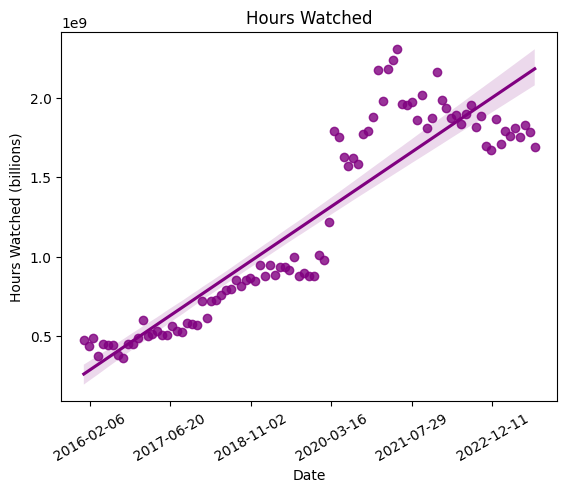

In [65]:
ax = sns.regplot(data=df_global, x='dateordinal', y='Hours_watched', color='purple')
new_labels = [dt.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set(title='Hours Watched', ylabel='Hours Watched (billions)', xlabel = 'Date')
plt.xticks(rotation=30)
plt.show()

In [66]:
game_data = pd.read_csv('/content/drive/MyDrive/setdata/Twitch_game_data.csv',encoding='latin1')
game_data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [67]:
game_data[game_data['Game'].isnull()] # A quick check to see if the missing data point is relevant.

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7561,162,NaN,2,2019,317951,77004,30919,5804,21758,473,114,4.13


In [68]:
top10= game_data[(game_data['Rank']<11) & (game_data['Year']==2023) & (game_data['Month']==3)].reset_index()

In [69]:
top10['date']=pd.to_datetime(top10[['Year','Month']].assign(day=1))
top10

,index,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,date
0,17200,1,Just Chatting,3,2023,274027644,2925605,1183419,6220,495201,368812,3937,93.67,2023-03-01
1,17201,2,League of Legends,3,2023,123088070,2204299,565937,4736,214209,165663,2966,55.84,2023-03-01
2,17202,3,Grand Theft Auto V,3,2023,111560661,2011349,510842,5299,229429,150148,2707,55.47,2023-03-01
3,17203,4,VALORANT,3,2023,96913750,3845475,1196352,7612,405553,130435,5175,25.20,2023-03-01
4,17204,5,Counter-Strike: Global Offensive,3,2023,65844705,1005456,889692,3035,156919,88620,1353,65.49,2023-03-01
5,17205,6,Minecraft,3,2023,55692185,1553855,1621931,4140,337046,74955,2091,35.84,2023-03-01
6,17206,7,Dota 2,3,2023,49367928,646613,400531,1711,52513,66444,870,76.35,2023-03-01
7,17207,8,Fortnite,3,2023,42256437,4254764,461687,14426,812797,56872,5726,9.93,2023-03-01
8,17208,9,Apex Legends,3,2023,41478301,2877848,165587,5545,336338,55825,3873,14.41,2023-03-01
9,17209,10,Diablo IV,3,2023,28940607,499584,954905,9582,84050,38951,672,57.93,2023-03-01


In [70]:
#Data for history of the top 10 games of March 2023
top10history= game_data[game_data['Game'].isin(['Just Chatting', 'League of Legends', 'Grand Theft Auto V', 'VALORANT', 'Counter-Strike: Global Offensive',
                                            'Minecraft', 'Dota 2', 'Fortnite', 'Apex Legends', 'Diablio IV'])].reset_index()
top10history['date']=pd.to_datetime(top10history[['Year','Month']].assign(day=1))
top10history= top10history.drop(columns=['index','Rank','Month','Year'])
top10history.head(11)

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,date
0,League of Legends,94377226,1362044,530270,2903,129172,127021,1833,69.29,2016-01-01
1,Counter-Strike: Global Offensive,47832863,830105,372654,2197,120849,64378,1117,57.62,2016-01-01
2,Dota 2,45185893,433397,315083,1100,44074,60815,583,104.26,2016-01-01
3,Minecraft,10231056,490002,64432,1538,88820,13769,659,20.88,2016-01-01
4,Grand Theft Auto V,4014296,407172,32724,1197,85441,5402,548,9.86,2016-01-01
5,League of Legends,93154772,1266715,475784,2712,117996,134035,1822,73.54,2016-02-01
6,Counter-Strike: Global Offensive,44933218,754901,235027,2097,106074,64652,1086,59.52,2016-02-01
7,Dota 2,41174229,384500,241065,1015,36912,59243,553,107.09,2016-02-01
8,Minecraft,8965231,440549,68098,1441,77621,12899,633,20.35,2016-02-01
9,Grand Theft Auto V,3216017,342897,40319,1113,70020,4627,493,9.38,2016-02-01


In [71]:
top10stats = top10history.groupby('Game').sum('Hours_watched').sort_values(by = 'Hours_watched', ascending= False)
top10stats

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Game,,,,,,,,
Just Chatting,11393601079,142478684,45472711,347314,22051017,15630518,195375,4768.25
League of Legends,9986345329,195677443,64098929,451503,16953359,13697225,268355,5057.70
Grand Theft Auto V,5962762759,104498883,24253043,287218,11721571,8177128,143208,4421.60
Fortnite,5500972607,382065012,41393252,1791871,47489499,7539355,523623,1105.61
Counter-Strike: Global Offensive,4315553263,80709385,46051691,220785,10947537,5927818,110689,4894.02
Dota 2,3938565038,47350572,29664529,124753,3361506,5397428,64902,8309.23
VALORANT,3748285566,140340258,21386195,336750,13757785,5146554,192443,1089.90
Minecraft,2766834778,107219350,31925110,280850,17394199,3792891,147011,2159.85
Apex Legends,2344694625,153747049,13033029,406159,15362948,3230889,211620,818.31


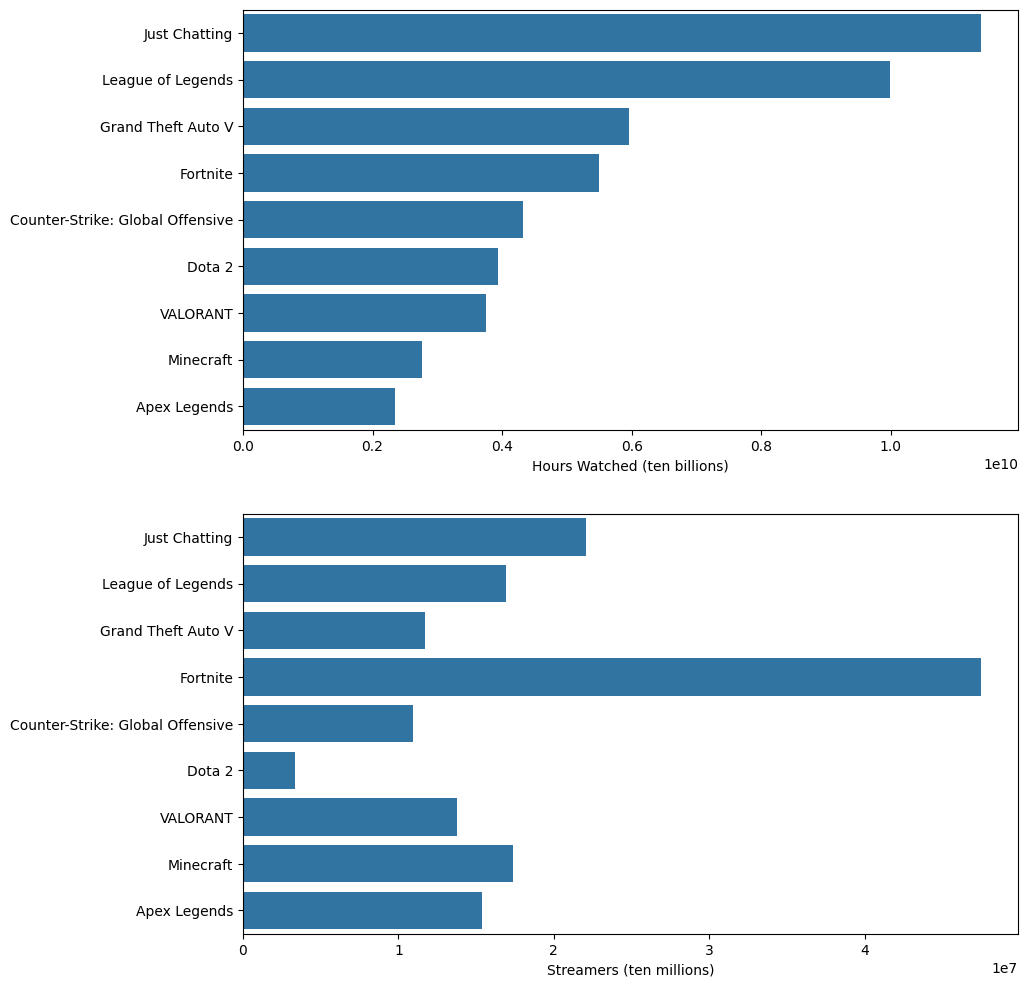

In [72]:
fig,axs = plt.subplots(nrows=2,figsize=(10,12))
gameslist=top10stats.index.tolist()
sns.barplot(x=top10stats['Hours_watched'],y=gameslist, ax=axs[0]).set(xlabel='Hours Watched (ten billions)')
sns.barplot(x=top10stats['Streamers'],y=gameslist, ax=axs[1]).set(xlabel='Streamers (ten millions)')
plt.show()

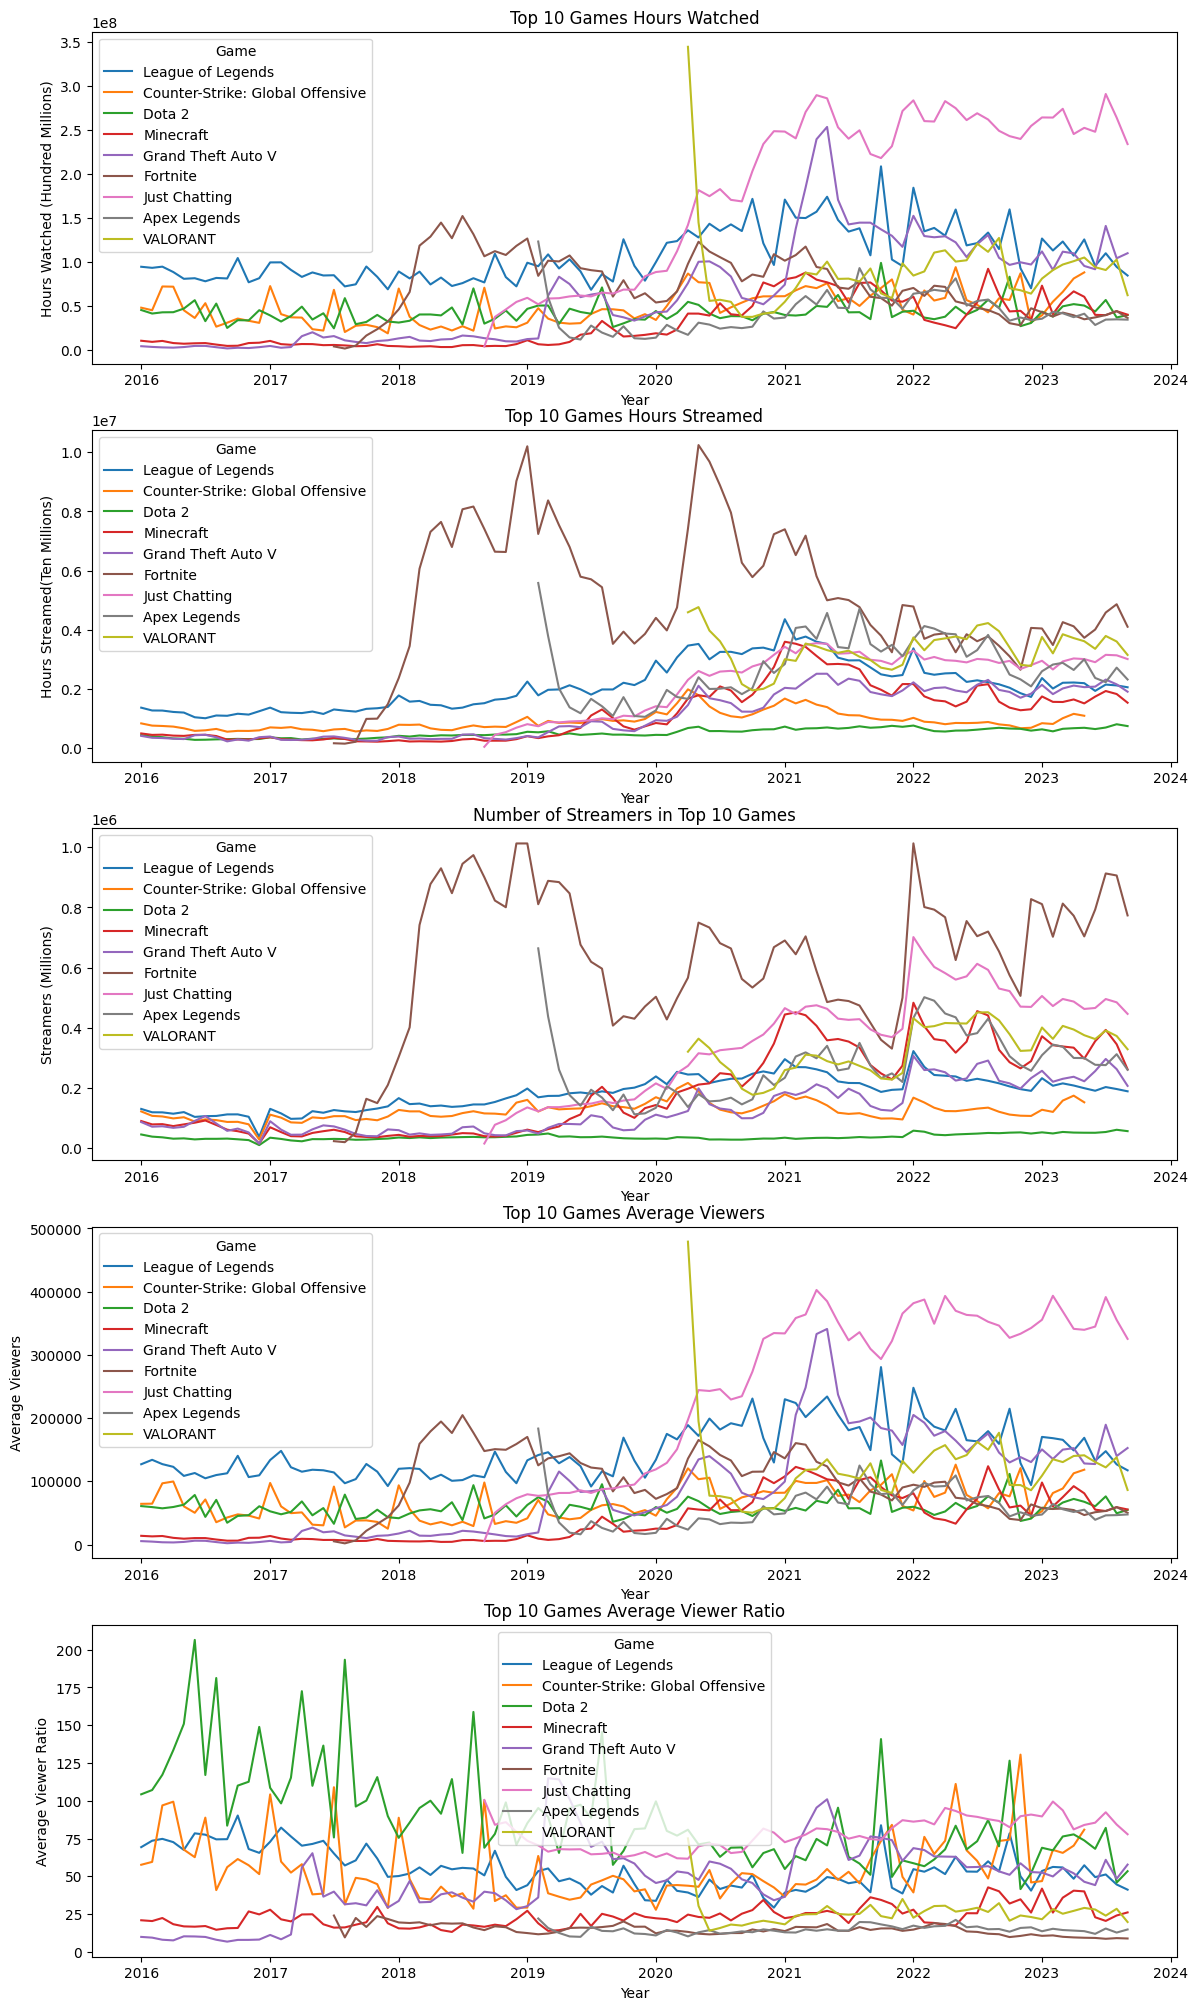

In [73]:
#Comparing Stats about the Top 10 Games over the years
fig, axs = plt.subplots(nrows=5, figsize=(14,25))
sns.lineplot(data=top10history, x='date', y= 'Hours_watched', hue='Game', ax = axs[0]).set(title= 'Top 10 Games Hours Watched', xlabel='Year', ylabel='Hours Watched (Hundred Millions)')
sns.lineplot(data=top10history, x='date', y= 'Hours_streamed', hue='Game', ax = axs[1]).set(title= 'Top 10 Games Hours Streamed', xlabel='Year', ylabel='Hours Streamed(Ten Millions)')
sns.lineplot(data=top10history, x='date', y= 'Streamers', hue='Game', ax = axs[2]).set(title= 'Number of Streamers in Top 10 Games', xlabel='Year', ylabel='Streamers (Millions)')
sns.lineplot(data=top10history, x='date', y= 'Avg_viewers', hue='Game', ax = axs[3]).set(title= 'Top 10 Games Average Viewers', xlabel='Year', ylabel='Average Viewers')
sns.lineplot(data=top10history, x='date', y= 'Avg_viewer_ratio', hue='Game', ax = axs[4]).set(title= 'Top 10 Games Average Viewer Ratio', xlabel='Year', ylabel='Average Viewer Ratio')
plt.show()

In [74]:
# Mengubah kolom Year dan Month menjadi kolom datetime
game_data['date'] = pd.to_datetime(game_data[['Year', 'Month']].assign(day=1))

# Menghapus kolom yang tidak diperlukan
df_game = game_data.copy().drop(columns=['Year', 'Month', 'Rank'])

# Menambahkan kolom dateordinal untuk digunakan dalam model
df_game['dateordinal'] = df_game['date'].map(dt.datetime.toordinal)

# Menampilkan 5 baris pertama data
df_game.head()

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,date,dateordinal
0,League of Legends,94377226,1362044,530270,2903,129172,127021,1833,69.29,2016-01-01,735964
1,Counter-Strike: Global Offensive,47832863,830105,372654,2197,120849,64378,1117,57.62,2016-01-01,735964
2,Dota 2,45185893,433397,315083,1100,44074,60815,583,104.26,2016-01-01,735964
3,Hearthstone,39936159,235903,131357,517,36170,53749,317,169.29,2016-01-01,735964
4,Call of Duty: Black Ops III,16153057,1151578,71639,3620,214054,21740,1549,14.03,2016-01-01,735964


**VISUALISASI DATASET**

Rata-rata dataset ditampilkan.

In [75]:
# Mengelompokkan data berdasarkan game dan tahun
df_game['Year'] = df_game['date'].dt.year
df_grouped = df_game.groupby(['Game', 'Year']).agg({
    'Hours_watched': 'sum',
    'Hours_streamed': 'sum',
    'Streamers': 'sum',
    'Avg_viewers': 'mean',
    'Avg_viewer_ratio': 'mean'
}).reset_index()

df_grouped.head()

,Game,Year,Hours_watched,Hours_streamed,Streamers,Avg_viewers,Avg_viewer_ratio
0,.hack//G.U. Last Recode,2017,145350,35258,3174,202.000000,4.120000
1,20 Minutes Till Dawn,2022,911356,12253,3616,1267.000000,74.380000
2,60 Parsecs!,2018,529688,1867,606,736.000000,283.710000
3,60 Seconds!,2016,1151013,3165,1096,517.666667,347.346667
4,60 Seconds!,2017,623520,1932,728,282.000000,321.736667


**TRAINING**


---



In [76]:
from sklearn.model_selection import train_test_split

# Menyiapkan fitur dan target
features = ['Year', 'Hours_streamed', 'Streamers', 'Avg_viewers', 'Avg_viewer_ratio']
target = 'Hours_watched'

X = df_grouped[features]
y = df_grouped[target]

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Melatih model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

**PREDIKSI GAME POPULER 2024**

---



In [78]:
# Membuat data prediksi untuk tahun 2024
pred_year = 2024

# Membuat dataframe untuk prediksi
pred_data = df_grouped[df_grouped['Year'] == 2023].copy()
pred_data['Year'] = pred_year

# Memisahkan fitur yang digunakan untuk prediksi
pred_X = pred_data[features]

# Melakukan prediksi
pred_y = model.predict(pred_X)

# Menambahkan hasil prediksi ke dataframe
pred_data['Predicted_Hours_watched'] = pred_y
pred_data = pred_data[['Game', 'Year', 'Predicted_Hours_watched']]
pred_data.head()


,Game,Year,Predicted_Hours_watched
14,7 Days to Die,2024,19830771.35
29,ANIME WORLD,2024,4619721.96
38,ARK: Survival Evolved,2024,18661226.49
46,ASMR,2024,79391990.24
65,Age of Empires II,2024,16471661.55


**VISUALISASI MODEL**


---

Hasil prediksi menggunakan metode *random forest*.

Mean Squared Error: 517928087811538.1


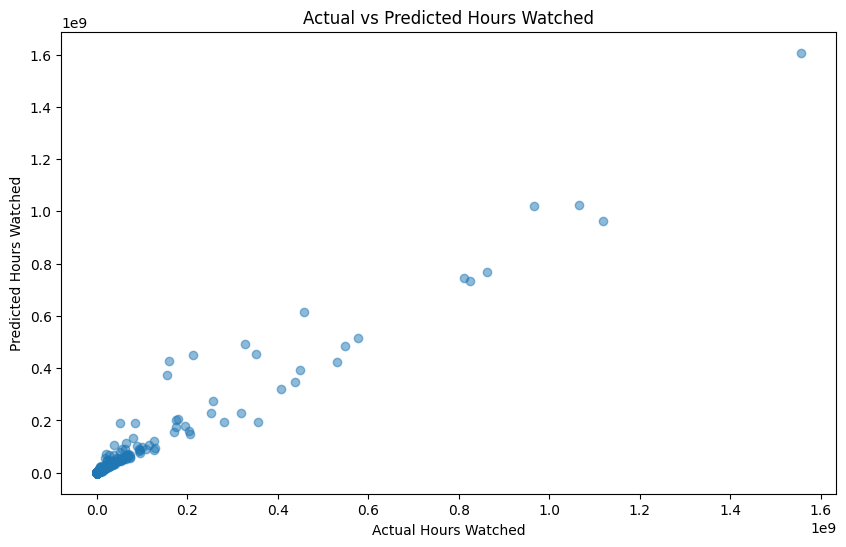

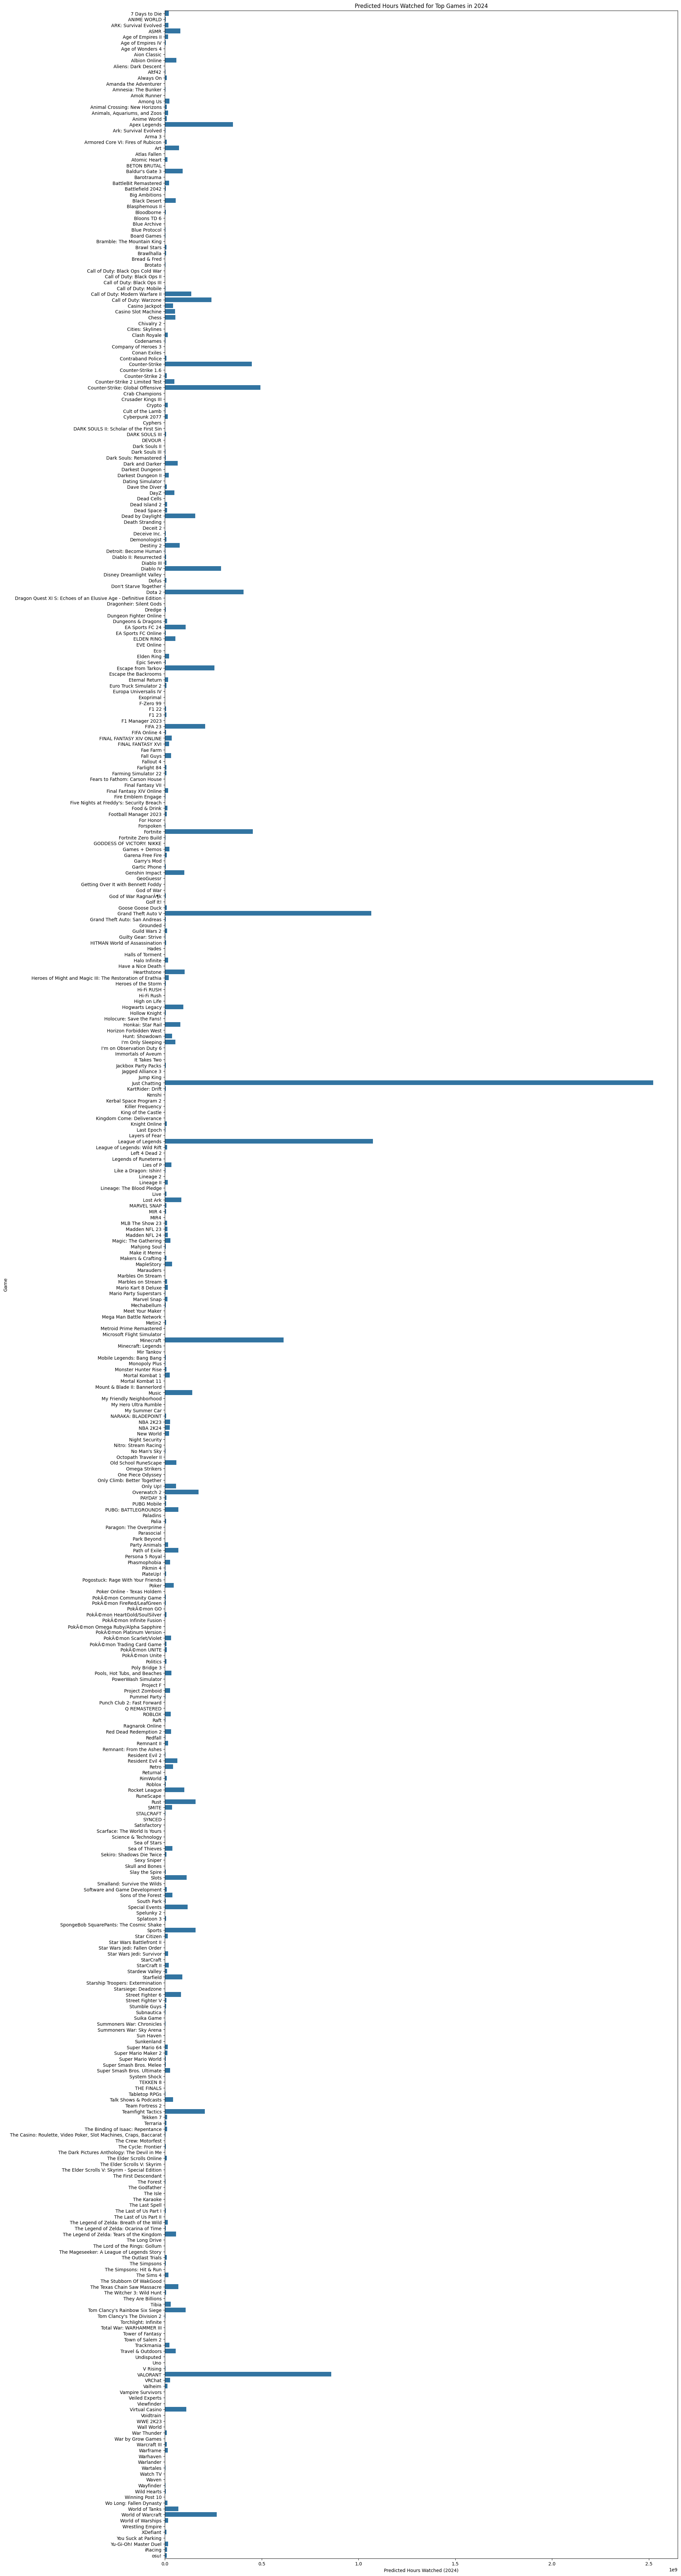

In [79]:
from sklearn.metrics import mean_squared_error

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Hours Watched')
plt.ylabel('Predicted Hours Watched')
plt.title('Actual vs Predicted Hours Watched')
plt.show()

# Visualisasi prediksi untuk tahun 2024
plt.figure(figsize=(20, 100))
sns.barplot(x='Predicted_Hours_watched', y='Game', data=pred_data)
plt.xlabel('Predicted Hours Watched (2024)')
plt.ylabel('Game')
plt.title('Predicted Hours Watched for Top Games in 2024')
plt.show()


In [80]:
sorted_data = pred_data.sort_values(by='Predicted_Hours_watched', ascending=False)

# Menampilkan hasil dalam bentuk daftar dengan nomor urut
result_list = sorted_data[['Game', 'Predicted_Hours_watched']].values.tolist()

for idx, (game, hours) in enumerate(result_list, start=1):
    print(f"{idx}. Game: {game}, Predicted Hours Watched: {hours}")

1. Game: Just Chatting, Predicted Hours Watched: 2522944700.9
2. Game: League of Legends, Predicted Hours Watched: 1074108923.97
3. Game: Grand Theft Auto V, Predicted Hours Watched: 1065446968.3
4. Game: VALORANT, Predicted Hours Watched: 859375892.5
5. Game: Minecraft, Predicted Hours Watched: 613612491.34
6. Game: Counter-Strike: Global Offensive, Predicted Hours Watched: 493378258.86
7. Game: Fortnite, Predicted Hours Watched: 454646954.22
8. Game: Counter-Strike, Predicted Hours Watched: 449811593.67
9. Game: Dota 2, Predicted Hours Watched: 406536104.54
10. Game: Apex Legends, Predicted Hours Watched: 351653471.13
11. Game: Diablo IV, Predicted Hours Watched: 290736997.24
12. Game: World of Warcraft, Predicted Hours Watched: 268856304.81
13. Game: Escape from Tarkov, Predicted Hours Watched: 256766478.31
14. Game: Call of Duty: Warzone, Predicted Hours Watched: 241136260.39
15. Game: FIFA 23, Predicted Hours Watched: 207472309.34
16. Game: Teamfight Tactics, Predicted Hours Watch

**KESIMPULAN**


---

Dapat kami simpulkan bahwa beberapa game yang akan populer pada tahun 2024 di twitch ialah
1. Game: Just Chatting, Predicted Hours Watched: 2522944700.9
2. Game: League of Legends, Predicted Hours Watched: 1074108923.97
3. Game: Grand Theft Auto V, Predicted Hours Watched: 1065446968.3
4. Game: VALORANT, Predicted Hours Watched: 859375892.5
5. Game: Minecraft, Predicted Hours Watched: 613612491.34